In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [3]:

dataPath = '../preprocess_train_dataset/normalized_train_data.csv'

dataframe = pd.read_csv(dataPath)

In [4]:
#show datatype of data
dataframe.dtypes

HomePlanet_Earth                bool
HomePlanet_Europa               bool
HomePlanet_Mars                 bool
CryoSleep                       bool
Cabin_deck_A                    bool
Cabin_deck_B                    bool
Cabin_deck_C                    bool
Cabin_deck_D                    bool
Cabin_deck_E                    bool
Cabin_deck_F                    bool
Cabin_deck_G                    bool
Cabin_deck_T                    bool
Cabin_num                    float64
Cabin_side_P                    bool
Cabin_side_S                    bool
Destination_55 Cancri e         bool
Destination_PSO J318.5-22       bool
Destination_TRAPPIST-1e         bool
Age                          float64
VIP                             bool
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Transported                     bool
dtype: object

In [5]:
# Extract the feature columns only in number
features = dataframe[['Cabin_num', 'Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

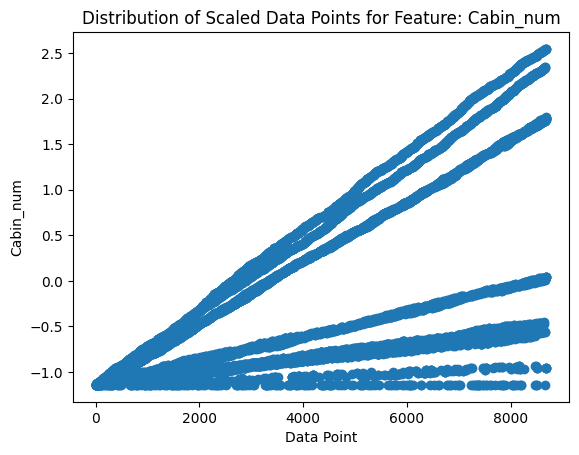

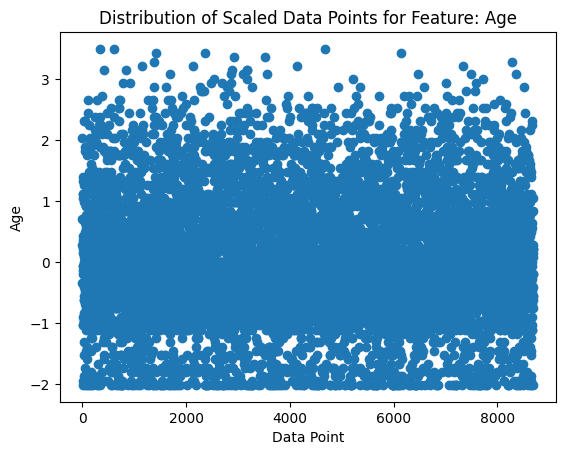

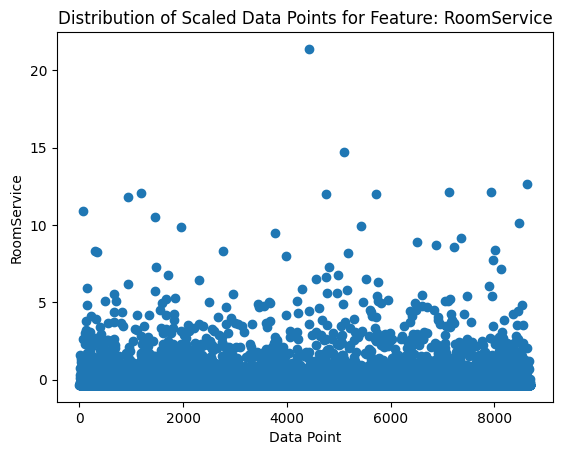

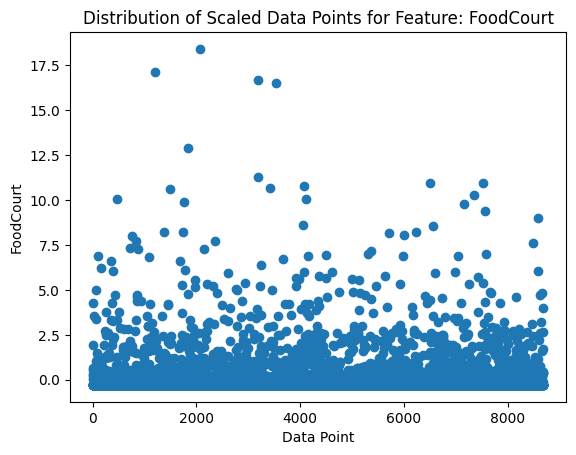

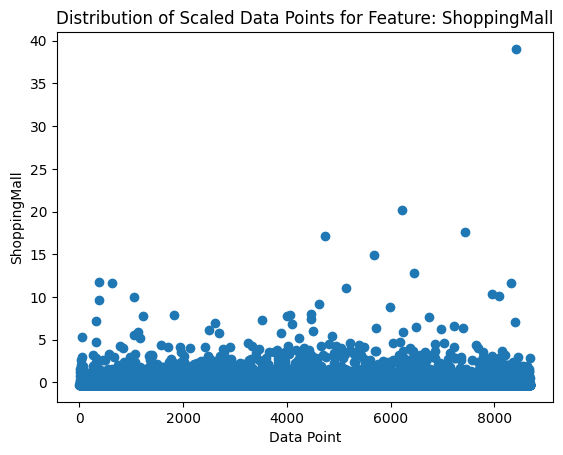

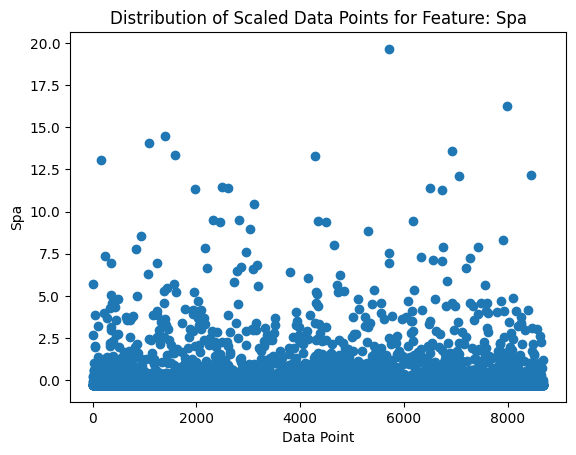

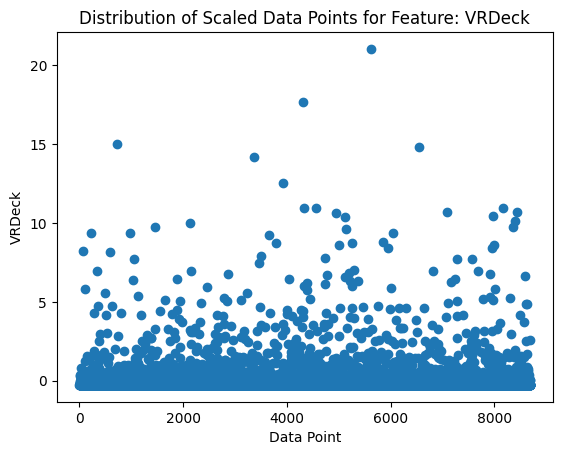

In [14]:
#Plotting distribution of scaled data points to decide eps

# Create a DataFrame for the scaled features
scaled_dataframe = pd.DataFrame(scaled_features, columns=features.columns)

# Plot the distribution of scaled data points for each feature
for column in scaled_dataframe.columns:
    plt.figure()
    plt.scatter(scaled_dataframe.index, scaled_dataframe[column])
    plt.xlabel('Data Point')
    plt.ylabel(column)
    plt.title(f'Distribution of Scaled Data Points for Feature: {column}')
    plt.show()

In [27]:


# Apply DBSCAN for outlier detection on each feature separately
eps = 2.5  # Distance threshold for DBSCAN
min_samples = 5  # Minimum number of samples in a cluster

outliers = pd.DataFrame()

for column in features.columns:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(scaled_features[:, features.columns.get_loc(column)].reshape(-1, 1))
    column_outliers = dataframe[labels == -1]
    column_outliers['Feature'] = column
    outliers = pd.concat([outliers, column_outliers])



C:\Users\865u5\AppData\Local\Temp\ipykernel_12092\3831133381.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
C:\Users\865u5\AppData\Local\Temp\ipykernel_12092\3831133381.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
C:\Users\865u5\AppData\Local\Temp\ipykernel_12092\3831133381.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

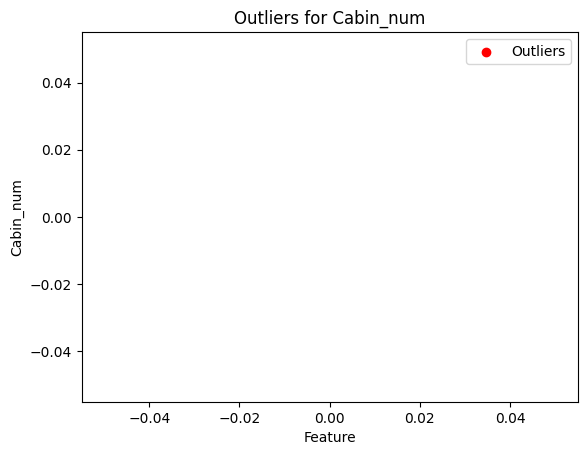

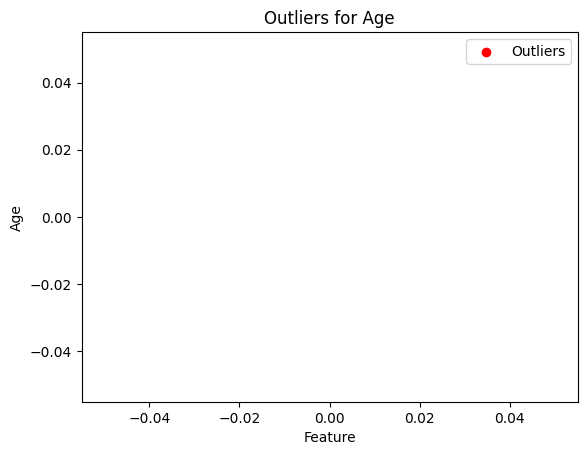

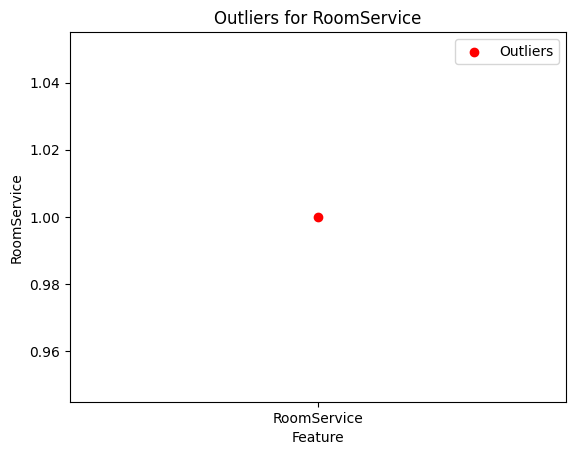

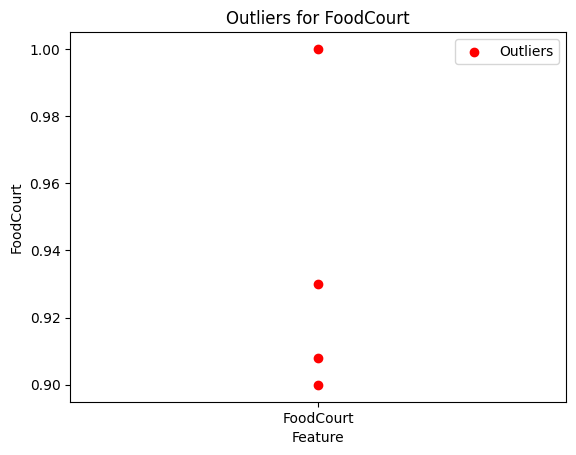

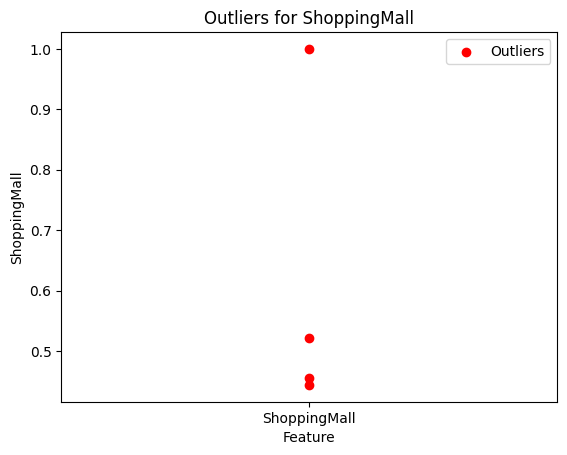

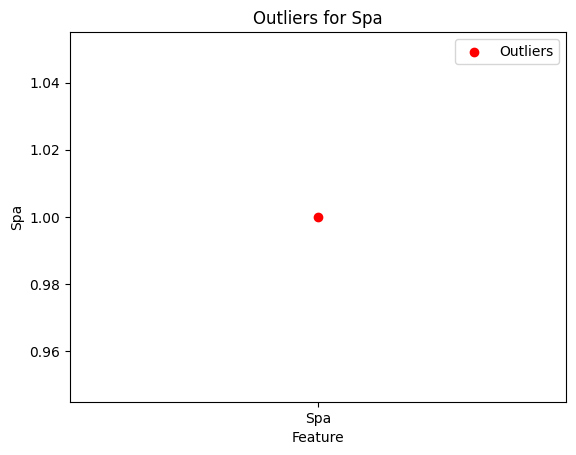

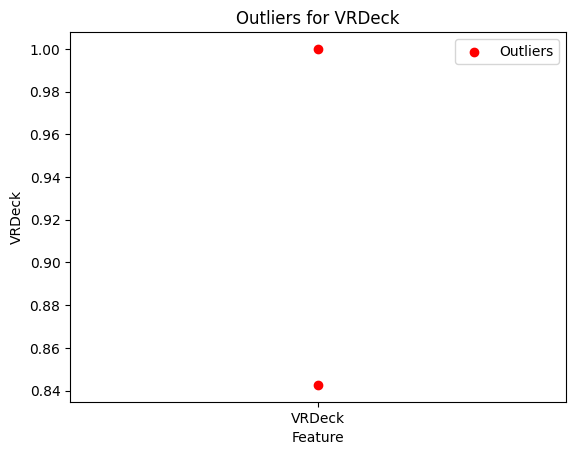

In [28]:
# Visualize the outliers for each feature
for column in features.columns:
    column_outliers = outliers[outliers['Feature'] == column]
    plt.scatter(column_outliers['Feature'], column_outliers[column], color='red', label='Outliers')
    plt.xlabel('Feature')
    plt.ylabel(column)
    plt.title(f'Outliers for {column}')
    plt.legend()
    plt.show()